<a href="https://colab.research.google.com/github/Hamid-Mofidi/PNP/blob/main/Q2contribution/Q2-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PNP: Higher order contributions of permanent charge on ionic flows

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def zeroth_order_terms(V, alpha, beta, L, R, z1, z2):
    c10a = (1/z1) * ((1 - alpha) * L + alpha * R)
    c20a = (-z1/z2) * c10a
    c10b = (1/z1) * ((1 - beta) * L + beta * R)
    c20b = (-z1/z2) * c10b
    phi0a = V * (np.log(((1 - alpha) * L + alpha * R)) - np.log(R)) / (np.log(L) - np.log(R))
    phi0b = V * (np.log(((1 - beta)  * L + beta * R)) - np.log(R)) / (np.log(L) - np.log(R))
    y0 = ((1.0 / ((z1 - z2) * (L - R))) * np.log(((1 - alpha) * L + alpha * R) / ((1 - beta) * L + beta * R)))
    J10 = ((L - R) / (z1 * (np.log(L) - np.log(R)))) * (z1 * V + np.log(L) - np.log(R))
    J20 = ((R - L) / (z2 * (np.log(L) - np.log(R)))) * (z2 * V + np.log(L) - np.log(R))
    return c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20

In [3]:
def first_order_terms(V, alpha, beta, L, R, z1, z2):
    c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V, alpha, beta, L, R, z1, z2)
    c11a = (z2 * alpha * (phi0b - phi0a) / (z1 - z2)) - (1 / (2 * (z1 - z2)))
    c21a = (z1 * alpha * (phi0b - phi0a) / (z2 - z1)) - (1 / (2 * (z2 - z1)))
    c11b = (z2 * (1 - beta) * (phi0a - phi0b) / (z1 - z2)) - (1 / (2 * (z1 - z2)))
    c21b = (z1 * (1 - beta) * (phi0a - phi0b) / (z2 - z1)) - (1 / (2 * (z2 - z1)))
    c1L  = L / z1
    c1R  = R / z1
    T0   =   J10 +  J20

    A = -((beta - alpha) * (L - R) ** 2) / (((1 - alpha) * L + alpha * R) * ((1 - beta) * L + beta * R) * (np.log(L) - np.log(R)))
    B = ( np.log(((1 - beta) * L + beta * R)) - np.log(((1 - alpha) * L + alpha * R))  ) / A

    lambda_val = V / (np.log(L) - np.log(R))
    phi1a = ((1 + z1 * lambda_val) * (1 + z2 * lambda_val) * (c10b - c10a) * (np.log(c1L) - np.log(c10a))) / (z1 * (z1 - z2) * c10a * c10b * (np.log(c1R) - np.log(c1L))) \
                  + (1 / (2 * z1 * (z1 - z2) * c10a)) + (lambda_val * ((z2 * alpha * (phi0b - phi0a)) / ((z1 - z2) * c10a) ) )
    phi1b = ((1 + z1 * lambda_val) * (1 + z2 * lambda_val) * (c10b - c10a) * (np.log(c1R) - np.log(c10b))) / (z1 * (z1 - z2) * c10a * c10b * (np.log(c1R) - np.log(c1L))) \
                  + (1 / (2 * z1 * (z1 - z2) * c10b)) + (lambda_val * ((z2 * (1 - beta) * (phi0a - phi0b)) / ((z1 - z2) * c10b) ) )
    y1 = (((1 - beta) * c1L + alpha * c1R) * (phi0a - phi0b)) / (z1 * (z1 - z2) * T0 * c10a * c10b) \
           + ((np.log(c10a) - np.log(c10b)) * (phi0a - phi0b)) / (z1 * (z1 - z2) * T0 * (c1L - c1R)) \
            - (((z2 * J10 + z1 * J20) * (c10a - c10b)) / (z1 ** 2 * z2 * (z1 - z2) * T0 ** 2 * c10a * c10b))
    J11 = ( (A * (z2 * (1 - B) * V + np.log(L) - np.log(R))) / ((z1 - z2) * (np.log(L) - np.log(R))**2) ) * (z1 * V + np.log(L) - np.log(R))
    J21 = ( (A * (z1 * (1 - B) * V + np.log(L) - np.log(R))) / ((z2 - z1) * (np.log(L) - np.log(R))**2) ) * (z2 * V + np.log(L) - np.log(R))


    return c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21

In [4]:
# Define the parameter values
alpha = 1/3
beta = 2/3
z1 = 1
z2 = -1
L  = 1
R  = 2

A = -((beta - alpha) * (L - R) ** 2) / (((1 - alpha) * L + alpha * R) * ((1 - beta) * L + beta * R) * (np.log(L) - np.log(R)))
B = ( np.log(((1 - beta) * L + beta * R)) - np.log(((1 - alpha) * L + alpha * R))  ) / A

Vq1 = (np.log(R) - np.log(L)) / (z2 * (1 - B))   # obtained from Theorem 4.8 in 2015 paper (Effects of small permanent charge...)
Vq2 = (np.log(R) - np.log(L)) / (z1 * (1 - B))

Vqmin = np.min([Vq1, Vq2])  #Vq1, Vq2 are still scalars
Vqmax = np.max([Vq1, Vq2])

V1_range = np.linspace(Vqmin-100, Vqmin, 20)
V2_range = np.linspace(Vqmin, Vqmax, 20)   # see theorem 4.8 on the paper "Effects of small permanent charge... 2015"
V3_range = np.linspace(Vqmax, Vqmax+100, 20)

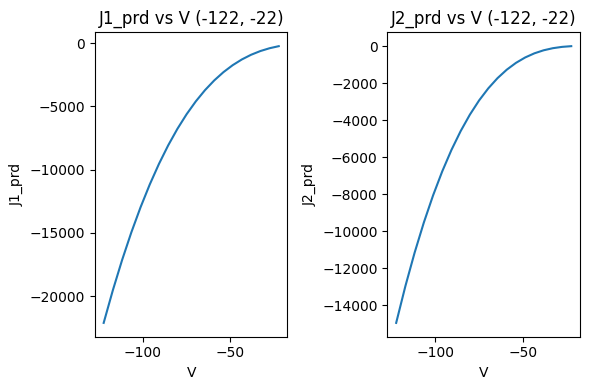

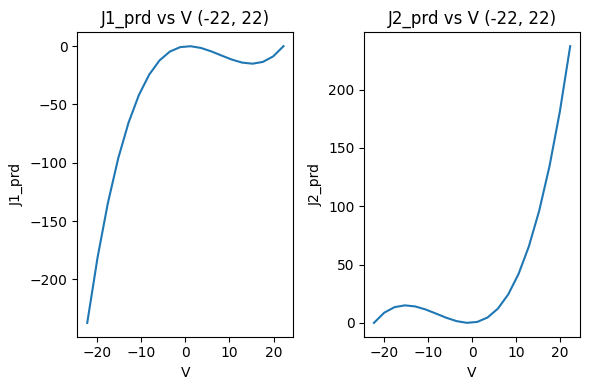

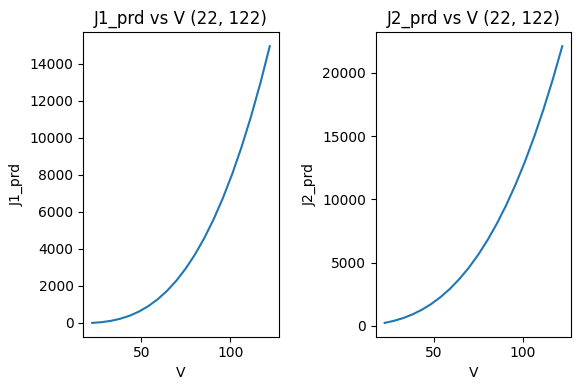

In [5]:
# Create a list of V ranges
V_ranges = [V1_range, V2_range, V3_range]

# Iterate over the ranges and call zeroth_order_terms
for i, V_range in enumerate(V_ranges, 1):
  c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V_range, alpha, beta, L, R, z1, z2)
  c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(V_range, alpha, beta, L, R, z1, z2)
  Q = 0.01
  J1_prd = J10 * J11
  J2_prd = J20 * J21

  # Create the desired plots
  plt.figure(figsize=(6, 4))

  plt.subplot(1, 2, 1)
  plt.plot(V_range, J1_prd)
  plt.xlabel('V')
  plt.ylabel('J1_prd')
  # Create the title dynamically based on the values of Vqmin and Vqmax
  if i == 1:
    title = f'J1_prd vs V ({int(Vqmin)-100}, {int(Vqmin)})'
  elif i == 2:
    title = f'J1_prd vs V ({int(Vqmin)}, {int(Vqmax)})'
  elif i == 3:
    title = f'J1_prd vs V ({int(Vqmax)}, {int(Vqmax) + 100})'
  else:
    title = f'J1_prd vs V (Range {i})'

  plt.title(title)

  plt.subplot(1, 2, 2)
  plt.plot(V_range, J2_prd)
  plt.xlabel('V')
  plt.ylabel('J2_prd')
  # Create the title dynamically based on the values of Vqmin and Vqmax
  if i == 1:
    title = f'J2_prd vs V ({int(Vqmin)-100}, {int(Vqmin)})'
  elif i == 2:
    title = f'J2_prd vs V ({int(Vqmin)}, {int(Vqmax)})'
  elif i == 3:
    title = f'J2_prd vs V ({int(Vqmax)}, {int(Vqmax) + 100})'
  else:
    title = f'J2_prd vs V (Range {i})'

  plt.title(title)
  plt.tight_layout()
  plt.show()

In [6]:
print(J10)
print(J11)
print(J10*J11)
print(A)
print(B)

[ 31.11081431  38.7039461   46.2970779   53.89020969  61.48334149
  69.07647328  76.66960507  84.26273687  91.85586866  99.44900046
 107.04213225 114.63526405 122.22839584 129.82152763 137.41465943
 145.00779122 152.60092302 160.19405481 167.7871866  175.3803184 ]
[ 0.          0.99028606  2.36913058  4.13653353  6.29249494  8.83701479
 11.77009309 15.09172984 18.80192503 22.90067868 27.38799076 32.2638613
 37.52829028 43.18127771 49.22282359 55.65292792 62.47159069 69.67881191
 77.27459157 85.25892969]
[    0.            38.32797845   109.6838228    222.91865955
   386.88361518   610.4298162    902.40838911  1271.6704604
  1727.06715657  2277.44960412  2931.66892955  3698.57625935
  4587.02272002  5605.85943806  6763.93753996  8070.10815223
  9533.22240136 11162.13141385 12965.68631619 14952.73823489]
0.21640425613334452
1.0311421563571856
